# Projet M1 SID  -  German Data

- GAHN Alioune Badara Ba

# 1) Importation et nettoyage des données

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from math import *
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
col_names = ["age", "workclass", "fnlwgt", "education", "education_num", "maritalStatus", "occupation", "relationship", "race", "sex", "capitalGain", "capitalLoss", "hoursPerWeek", "nativeCountry", "isUpper"];
col_cats = ["workclass", "education", "maritalStatus", "occupation", "relationship", "race", "sex", "nativeCountry", "isUpper"];

dtypes = {
    col: 'category'
    for col in col_cats
}

data = pd.read_csv('adult.data', names=col_names, dtype=dtypes)

- Suppression des espaces et majuscules dans les chaines de caractères :

In [3]:
for col in col_cats:
    data[col]=[(lambda x: x.strip().lower())(x) for x in data[col]]
for col in col_cats:
    data[col]=[(lambda x: x.replace("-","_"))(x) for x in data[col]]

- Suppression des lignes incomplètes :

In [4]:
myQuery = ' != "?" and '.join(data.columns)+' != "?"'
data=data.query(myQuery)

- Changement de la colonne isUpper en booleen :

In [5]:
data['isUpper']=np.where(data['isUpper'] == '>50k', True, False)
data.head(8)

,age,workclass,fnlwgt,education,education_num,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,isUpper
0,39,state_gov,77516,bachelors,13,never_married,adm_clerical,not_in_family,white,male,2174,0,40,united_states,False
1,50,self_emp_not_inc,83311,bachelors,13,married_civ_spouse,exec_managerial,husband,white,male,0,0,13,united_states,False
2,38,private,215646,hs_grad,9,divorced,handlers_cleaners,not_in_family,white,male,0,0,40,united_states,False
3,53,private,234721,11th,7,married_civ_spouse,handlers_cleaners,husband,black,male,0,0,40,united_states,False
4,28,private,338409,bachelors,13,married_civ_spouse,prof_specialty,wife,black,female,0,0,40,cuba,False
5,37,private,284582,masters,14,married_civ_spouse,exec_managerial,wife,white,female,0,0,40,united_states,False
6,49,private,160187,9th,5,married_spouse_absent,other_service,not_in_family,black,female,0,0,16,jamaica,False
7,52,self_emp_not_inc,209642,hs_grad,9,married_civ_spouse,exec_managerial,husband,white,male,0,0,45,united_states,True


- Ajout d'une nouvelle colonne family qui est fonction des colonnes maritalStatus et relationship :

In [6]:
data['family']=[(lambda m,r:
                 'mc' if m[0:7].lower()=='married' and r[0:3].lower()=='own'
            else 'm' if m[0:7].lower()=='married'
            else 'sc' if (m[0:5].lower()=='never' or m[0:5].lower()=='divor' or m[0:5].lower()=='separ' or m[0:5].lower()=='widow') and r[0:3].lower()=='own'
            else 's' if (m[0:5].lower()=='never' or m[0:5].lower()=='divor' or m[0:5].lower()=='separ' or m[0:5].lower()=='widow')
            else 'err')
            (row[1],row[2])
    for row in data[['maritalStatus','relationship']].itertuples()]
data.head()

,age,workclass,fnlwgt,education,education_num,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,isUpper,family
0,39,state_gov,77516,bachelors,13,never_married,adm_clerical,not_in_family,white,male,2174,0,40,united_states,False,s
1,50,self_emp_not_inc,83311,bachelors,13,married_civ_spouse,exec_managerial,husband,white,male,0,0,13,united_states,False,m
2,38,private,215646,hs_grad,9,divorced,handlers_cleaners,not_in_family,white,male,0,0,40,united_states,False,s
3,53,private,234721,11th,7,married_civ_spouse,handlers_cleaners,husband,black,male,0,0,40,united_states,False,m
4,28,private,338409,bachelors,13,married_civ_spouse,prof_specialty,wife,black,female,0,0,40,cuba,False,m


- Ajout d'une nouvelle colonne Caucasian :

In [7]:
data['Caucasian']=[(lambda x : True if x.lower()=='white' else False)(h) for h in data['race']]

- Modification de la colonne nativeCountry :

In [8]:
data['nativeCountry']=[(lambda c:
                 'eu' if c.lower() in ['france','germany','poland','england','portugal','italy','scotland','greece','ireland','yugoslavia','hungary','holand_netherlands']
            else 'n_am' if c.lower() in ['united_states','canada']
            else 'lat_am' if c.lower() in ['cuba','mexico','columbia','peru','el_salvador','guatemala','nicaragua','honduras','ecuador']
            else 'asia' if c.lower() in ['india','cambodia','thailand','laos','taiwan','china','japan','vietnam','hong','philippines','trinadad&tobago']
            else 'others' if c.lower() in ['jamaica','puerto_rico','iran','haiti','dominican_republic','south','outlying_us(guam_usvi_etc)']
            else 'err')
            (v)
    for v in data['nativeCountry']]
data.head()

,age,workclass,fnlwgt,education,education_num,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,isUpper,family,Caucasian
0,39,state_gov,77516,bachelors,13,never_married,adm_clerical,not_in_family,white,male,2174,0,40,n_am,False,s,True
1,50,self_emp_not_inc,83311,bachelors,13,married_civ_spouse,exec_managerial,husband,white,male,0,0,13,n_am,False,m,True
2,38,private,215646,hs_grad,9,divorced,handlers_cleaners,not_in_family,white,male,0,0,40,n_am,False,s,True
3,53,private,234721,11th,7,married_civ_spouse,handlers_cleaners,husband,black,male,0,0,40,n_am,False,m,False
4,28,private,338409,bachelors,13,married_civ_spouse,prof_specialty,wife,black,female,0,0,40,lat_am,False,m,False


#### Pour eviter un problème de discrimination, nous avons décider de supprimer les sexes et races. Nous avons également enlevé la variable education car elle correspond à une autre variable qu'on a gardé (education_num).


In [9]:
data=data.drop(columns=['maritalStatus', 'relationship','race','fnlwgt','sex','education','Caucasian'])
data.head()

,age,workclass,education_num,occupation,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,isUpper,family
0,39,state_gov,13,adm_clerical,2174,0,40,n_am,False,s
1,50,self_emp_not_inc,13,exec_managerial,0,0,13,n_am,False,m
2,38,private,9,handlers_cleaners,0,0,40,n_am,False,s
3,53,private,7,handlers_cleaners,0,0,40,n_am,False,m
4,28,private,13,prof_specialty,0,0,40,lat_am,False,m


- Passage au log des variables de gains et pertes de capital :

In [10]:
data['capitalLoss']=[(lambda v : 0 if v==0 else np.log(v))(x) for x in data['capitalLoss']]
data['capitalGain']=[(lambda v : 0 if v==0 else np.log(v))(x) for x in data['capitalGain']]

- Summary

In [11]:
data.describe()

,age,education_num,capitalGain,capitalLoss,hoursPerWeek
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,10.121312,0.743627,0.355199,40.931238
std,13.134665,2.549995,2.470462,1.594890,11.979984
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,11.512915,8.379309,99.000000


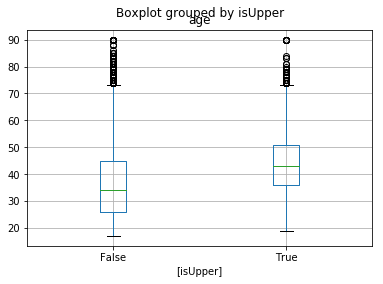

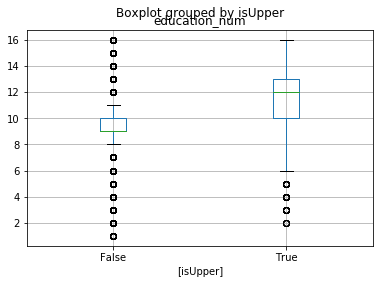

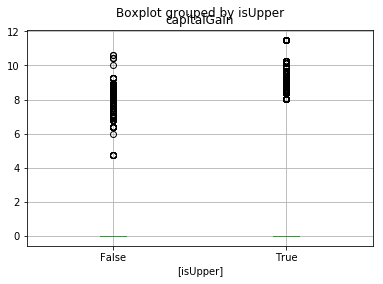

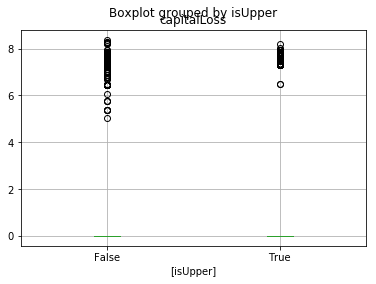

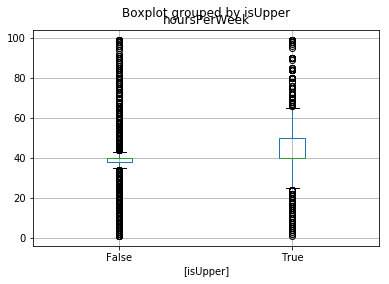

In [12]:
listevar=['age','education_num','capitalGain','capitalLoss','hoursPerWeek']
for l in listevar:
    data_box=data[['isUpper',l]]
    data_box.boxplot(by='isUpper')

Sur les variables age, education_num, hoursPerWeek on voit que les valeurs se répartissent différemment suivant si l'individu gagne plus ou moins de 50K$ . Ce qui explique donc notre choix de conserver ces variables pour la suite de notre analyse 

# 2) Random Forest

- Partionner des variables quantitatives en qualitatives

In [13]:
RFdata=data.copy()

In [14]:
RFdata['ageQ']=[(lambda a : 
           'T1' if a <22 
      else 'T2' if a <30 
      else 'T3' if a <40
      else 'T4' if a <50
      else 'T5' if a <60
      else 'T6')(age) for age in RFdata['age']]
RFdata['hoursPerWeekQ']=[(lambda a : 
           'H1' if a <=19 
      else 'H2' if a <=28 
      else 'H3' if a <=38
      else 'H4' if a <=50
      else 'H5' if a <=60
      else 'H6')(hour) for hour in RFdata['hoursPerWeek']]
RFdata['educationQ']=[(lambda a : 
         'Dropout' if a <9 
    else 'HS_grad' if a ==9 
    else 'HS_gradPlus' if a ==10
    else 'Associates' if a==11 or a==12
    else 'Bachelor' if a==13
    else 'Master' if a==14
    else 'Prof_school' if a==15
    else 'Doctorate' if a==16
    else 'ERR')(edu) for edu in RFdata['education_num']]

- suppression de certaines colonnes :

In [15]:
RFdata=RFdata.drop(columns=['age','hoursPerWeek','education_num'])
RFdata.head()

,workclass,occupation,capitalGain,capitalLoss,nativeCountry,isUpper,family,ageQ,hoursPerWeekQ,educationQ
0,state_gov,adm_clerical,7.684324,0.0,n_am,False,s,T3,H4,Bachelor
1,self_emp_not_inc,exec_managerial,0.000000,0.0,n_am,False,m,T5,H1,Bachelor
2,private,handlers_cleaners,0.000000,0.0,n_am,False,s,T3,H4,HS_grad
3,private,handlers_cleaners,0.000000,0.0,n_am,False,m,T5,H4,Dropout
4,private,prof_specialty,0.000000,0.0,lat_am,False,m,T2,H4,Bachelor


In [16]:
def partitionner(mdata,colonne,colRes,bornes):
    res=[]
    for v in mdata[colonne]:
        interval=0
        for ib,b in enumerate(bornes[1:]):
            if v >= bornes[ib] and v<=bornes[ib+1]:
                res.append(ib)
                break
    return(res)

- simplification de capitalGain et capitalLoss

In [17]:
RFdata['capitalLoss']=[(lambda v : 0 if v==0 else 1)(x) for x in RFdata['capitalLoss']]
RFdata['capitalGain']=partitionner(RFdata,'capitalGain','isUpper',bornes=[0.0, 0.24, 7.83, 8.814, 12.0])

In [18]:
RFdata.head()

,workclass,occupation,capitalGain,capitalLoss,nativeCountry,isUpper,family,ageQ,hoursPerWeekQ,educationQ
0,state_gov,adm_clerical,1,0,n_am,False,s,T3,H4,Bachelor
1,self_emp_not_inc,exec_managerial,0,0,n_am,False,m,T5,H1,Bachelor
2,private,handlers_cleaners,0,0,n_am,False,s,T3,H4,HS_grad
3,private,handlers_cleaners,0,0,n_am,False,m,T5,H4,Dropout
4,private,prof_specialty,0,0,lat_am,False,m,T2,H4,Bachelor


- Binarisation des variables car RandomForest a besoin de variables binaires.

Si une colonne occupation=[private,state,school] alors 3 colonnes sont créés :

occupation_private=[0,1];
occupation_state=[0,1];
occupation_school=[0,1];

- Puis division de l'enchantillon en train et test

In [19]:
dataDummies=pd.get_dummies(RFdata)
train, test = train_test_split(dataDummies, test_size=0.3)
train_features = train.drop('isUpper', 1) # pour supprimer définitivement f.drop('b', inplace=True)
test_features = test.drop('isUpper', 1)
train_res=train['isUpper']
test_res=test['isUpper']

- Création du model et entrainement sur l'echantillon train

In [20]:
rf = RandomForestClassifier(n_estimators = 200, random_state = 42)
rf.fit(train_features, train_res);

- Prédiction sur l'echantillon de test

In [21]:
predictions = rf.predict(test_features)

- Binarisation du résultat :

In [22]:
predictions = [(lambda x : 0 if x<0.5 else 1)(p) for p in predictions]

- Taux d'erreurs sur l'echantillon de test :

In [23]:
errors = abs(predictions - test_res)
print('Erreurs : '+str(round(np.mean(errors)*100, 2))+'%')

Erreurs : 16.66%


### Avec un gridSearch

In [24]:
tuned_parameters = {'n_estimators': [50,100,250,500,1000],'random_state':[42]}
grid = GridSearchCV(RandomForestClassifier(), tuned_parameters,cv=5, n_jobs=-1, verbose=1)
grid.fit(train_features, train_res)
print(grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   41.6s finished


{'n_estimators': 500, 'random_state': 42}


In [25]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 42)
rf.fit(train_features, train_res);

In [26]:
scoresCV=cross_val_score(rf,dataDummies.drop('isUpper', 1),dataDummies['isUpper'],cv=5)
print('Erreurs : '+str(round((1-scoresCV.mean())*100, 2))+'%')

Erreurs : 16.19%


# Régression logistique

## Régression sur les quantitatives avec binarisation de certaines qualitatives

In [27]:
col_quant=['age','education_num','capitalGain','capitalLoss','hoursPerWeek']
col_quali=['workclass','occupation','nativeCountry','family']
if 'isUpper' not in col_quali : col_quali.append('isUpper')

Ldata=data.copy()
Ldata.head()

,age,workclass,education_num,occupation,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,isUpper,family
0,39,state_gov,13,adm_clerical,7.684324,0.0,40,n_am,False,s
1,50,self_emp_not_inc,13,exec_managerial,0.000000,0.0,13,n_am,False,m
2,38,private,9,handlers_cleaners,0.000000,0.0,40,n_am,False,s
3,53,private,7,handlers_cleaners,0.000000,0.0,40,n_am,False,m
4,28,private,13,prof_specialty,0.000000,0.0,40,lat_am,False,m


In [28]:
Ldata[col_quant]=preprocessing.scale(Ldata[col_quant])

/home/david/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [29]:
LdataDummies=pd.get_dummies(Ldata[col_quant+col_quali])
Ltrain, Ltest = train_test_split(LdataDummies, test_size=0.3)

In [30]:
LdataDummies.head()

,age,education_num,capitalGain,capitalLoss,hoursPerWeek,isUpper,workclass_federal_gov,workclass_local_gov,workclass_private,workclass_self_emp_inc,...,occupation_transport_moving,nativeCountry_asia,nativeCountry_eu,nativeCountry_lat_am,nativeCountry_n_am,nativeCountry_others,family_m,family_mc,family_s,family_sc
0,0.042796,1.128918,2.809520,-0.222714,-0.077734,False,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.880288,1.128918,-0.301012,-0.222714,-2.331531,False,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,-0.033340,-0.439738,-0.301012,-0.222714,-0.077734,False,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,1.108695,-1.224066,-0.301012,-0.222714,-0.077734,False,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,-0.794697,1.128918,-0.301012,-0.222714,-0.077734,False,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [31]:
Ltrain_features = Ltrain.drop('isUpper', 1)
Ltest_features = Ltest.drop('isUpper', 1)
Ltrain_res=Ltrain['isUpper']
Ltest_res=Ltest['isUpper']

In [32]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='ovr',verbose=1,max_iter=2000).fit(Ltrain_features, Ltrain_res)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


In [33]:
prediction=logreg.predict(Ltest_features)

In [34]:
score=logreg.score(Ltest_features, Ltest_res)
print('Erreurs : '+str(round((1-score)*100,2))+'%')

Erreurs : 16.07%


# Gaussian

In [35]:
Gdata=data.copy()

In [36]:
Gtrain, Gtest = train_test_split(pd.get_dummies(Gdata), test_size=0.2)
Gtrain_features = train.drop('isUpper', 1)
Gtest_features = test.drop('isUpper', 1)
Gtrain_res=train['isUpper']
Gtest_res=test['isUpper']

In [37]:
clf_gaussian = GaussianNB()
clf_gaussian.fit(Gtrain_features, Gtrain_res)
prediction = clf_gaussian.predict(Gtest_features)
errors = abs(predictions - Gtest_res)
print('Erreurs : '+str(round(np.mean(errors)*100, 2))+'%')

Erreurs : 16.66%
